In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [2]:
crop= pd.read_csv('/kaggle/input/crop-recommendation-csv/Crop_recommendation.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop.shape
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
crop.duplicated().sum()

0

In [6]:
list1=set(i for i in crop.label)
list1

{'apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon'}

In [7]:
crop.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


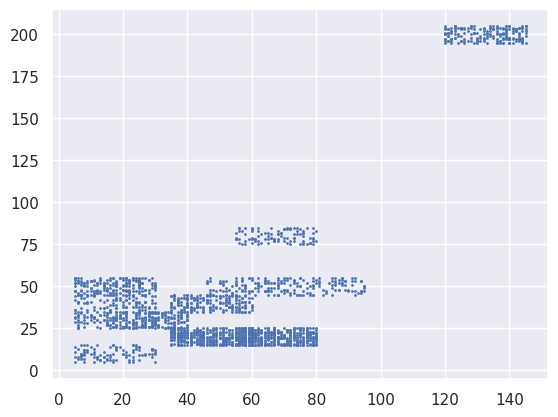

In [8]:
plt.scatter(crop['P'], crop['K'], s=1)
plt.show()

In [9]:

feacher=['N','P','K','temperature','humidity','ph','rainfall']
subset= crop[feacher]
subset.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [10]:
cor=subset.corr()

<Axes: >

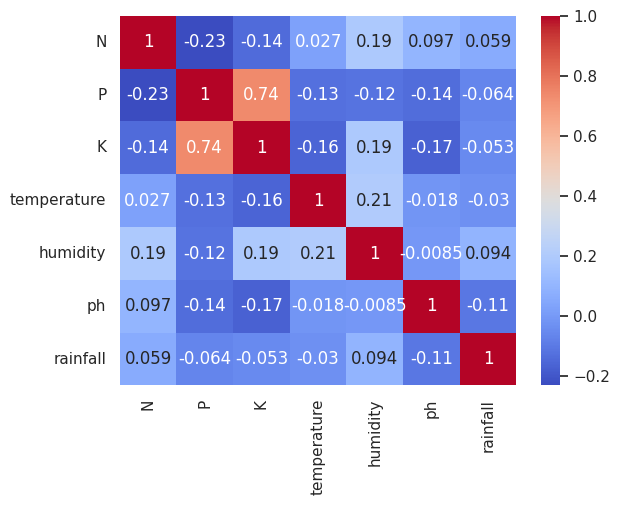

In [11]:
sns.heatmap(cor, annot= True, cbar= True, cmap='coolwarm')

In [12]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

/tmp/ipykernel_32/3669751595.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


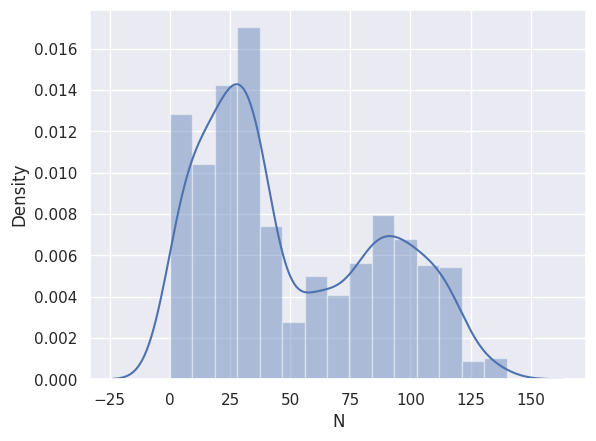

In [13]:
sns.distplot(crop['N'])
plt.show()

/tmp/ipykernel_32/2010524308.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop[x])


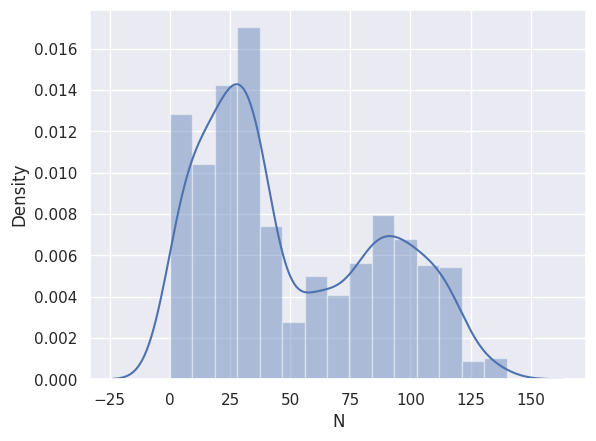

/tmp/ipykernel_32/2010524308.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop[x])


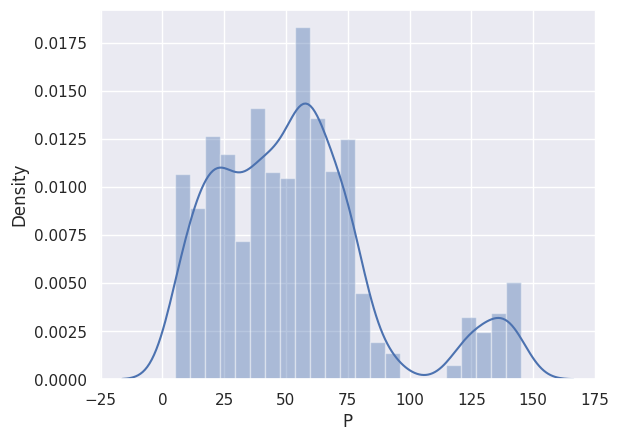

/tmp/ipykernel_32/2010524308.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop[x])


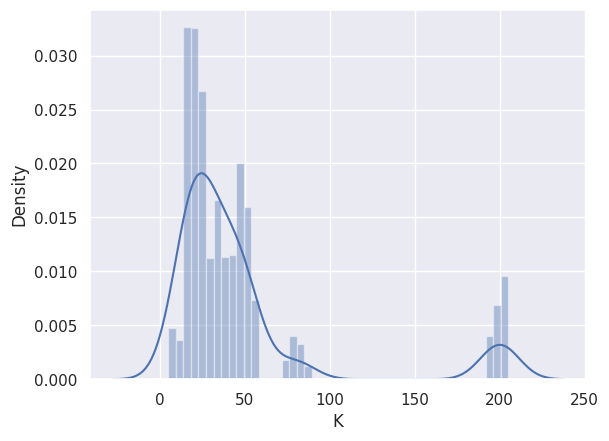

/tmp/ipykernel_32/2010524308.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop[x])


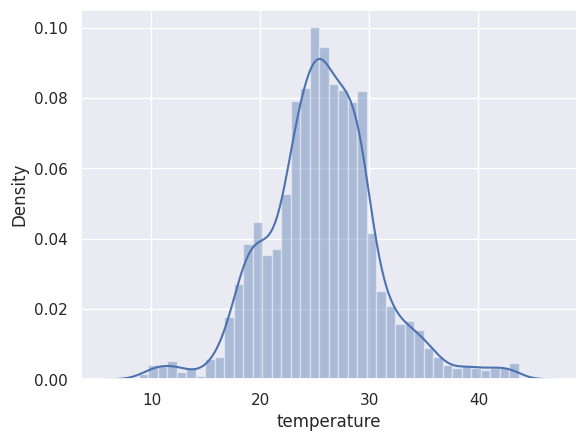

/tmp/ipykernel_32/2010524308.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop[x])


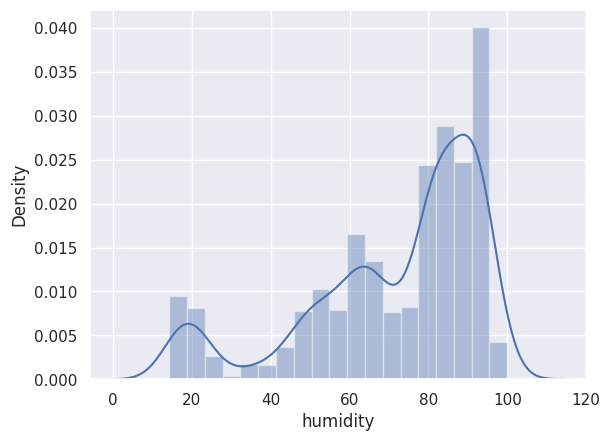

/tmp/ipykernel_32/2010524308.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop[x])


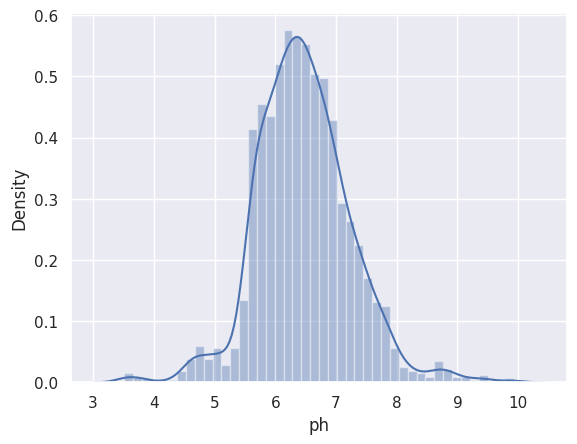

/tmp/ipykernel_32/2010524308.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop[x])


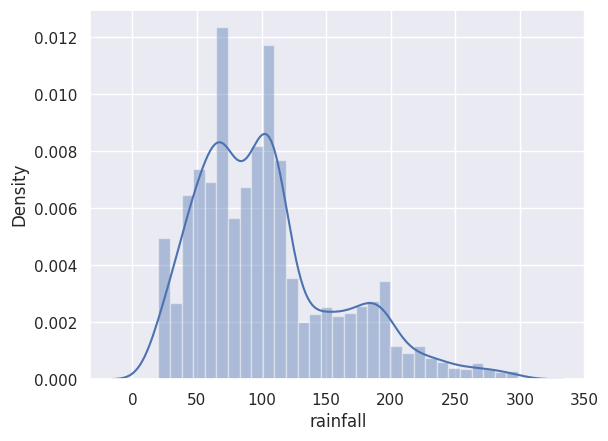

In [14]:
col = subset.columns
for x in col:
  sns.distplot(crop[x])
  plt.show()

In [15]:
crop_dict={
    'rice':1,
    'maize':2,
    'chickpea':3,
    'kidneybeans':4,
    'pigeonpeas':5,
    'mothbeans':6,
    'mungbean':7,
    'blackgram':8,
    'lentil':9,
    'pomegranate':10,
    'banana':11,
    'mango':12,
    'grapes':13,
    'watermelon':14,
    'muskmelon':15,
    'apple':16,
    'orange':17,
    'papaya':18,
    'coconut':19,
    'cotton':20,
    'jute':21,
    'coffee':22
}

crop['label'] = crop['label'].map(crop_dict)
print(crop)

        N   P   K  temperature   humidity        ph    rainfall  label
0      90  42  43    20.879744  82.002744  6.502985  202.935536      1
1      85  58  41    21.770462  80.319644  7.038096  226.655537      1
2      60  55  44    23.004459  82.320763  7.840207  263.964248      1
3      74  35  40    26.491096  80.158363  6.980401  242.864034      1
4      78  42  42    20.130175  81.604873  7.628473  262.717340      1
...   ...  ..  ..          ...        ...       ...         ...    ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507     22
2196   99  15  27    27.417112  56.636362  6.086922  127.924610     22
2197  118  33  30    24.131797  67.225123  6.362608  173.322839     22
2198  117  32  34    26.272418  52.127394  6.758793  127.175293     22
2199  104  18  30    23.603016  60.396475  6.779833  140.937041     22

[2200 rows x 8 columns]


In [16]:
x= crop.drop('label',axis=1)
y= crop['label']

In [17]:
y.isna().sum()

0

In [18]:
x.shape

(2200, 7)

In [19]:
print(x)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


In [20]:
des=x.describe()
print(des)

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [21]:
y.shape

(2200,)

In [22]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: label, Length: 2200, dtype: int64


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
x_test.shape

(440, 7)

In [25]:
y_test.shape

(440,)

In [26]:
y_train

1656    17
752      8
892      9
1041    11
1179    12
        ..
1638    17
1095    11
1130    12
1294    13
860      9
Name: label, Length: 1760, dtype: int64

In [27]:
x_train.shape

(1760, 7)

In [28]:
nan_df = y_train.isna().count()
print(nan_df)

1760


In [29]:
from sklearn.preprocessing import StandardScaler
sd= StandardScaler()
sd.fit(x_train)
x_train = sd.transform(x_train)
x_test = sd.transform(x_test)
print(x_train)

[[-9.03426596e-01 -1.12616170e+00 -6.68506601e-01 ...  9.36586183e-01
   1.93473784e-01  5.14970176e-03]
 [-3.67051340e-01  7.70358846e-01 -5.70589522e-01 ... -1.00470485e-01
   8.63917548e-01 -6.05290566e-01]
 [-1.17161422e+00  5.89737842e-01 -4.53089028e-01 ... -3.82774991e-01
   1.05029771e+00 -1.04580687e+00]
 ...
 [-1.06433917e+00 -5.24091685e-01 -3.35588533e-01 ... -8.98381379e-01
  -6.34357580e-04 -4.37358211e-02]
 [-1.06433917e+00  2.12501638e+00  3.05234239e+00 ...  3.86340190e-01
  -1.48467347e-01 -5.69036842e-01]
 [-5.01145154e-01  7.40255346e-01 -5.11839275e-01 ... -4.18045489e-01
   6.86860180e-01 -8.96531475e-01]]


In [30]:
print(x_train[1248])

[ 1.13479938 -0.31336718 -0.19850462 -0.38613322  0.66232491  0.66137655
  0.8659884 ]


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [32]:
models={
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbours': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()

}

In [33]:
for name,md in models.items():
  md.fit(x_train, y_train)
  ypred=md.predict(x_test)
  print(f"{name} with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression with accuracy : 0.9636363636363636
Naive Bayes with accuracy : 0.9954545454545455
Support Vector Machine with accuracy : 0.9681818181818181
K-Nearest Neighbours with accuracy : 0.9659090909090909
Decision Tree with accuracy : 0.9863636363636363
Random Forest with accuracy : 0.9954545454545455
Bagging with accuracy : 0.9886363636363636
AdaBoost with accuracy : 0.1409090909090909
Gradient Boosting with accuracy : 0.9818181818181818


In [34]:
  rfc=RandomForestClassifier()
  rfc.fit(x_train,y_train)
  ypred=rfc.predict(x_test)
  print(f"Accuracy is: {accuracy_score(y_test,ypred)}")

Accuracy is: 0.9931818181818182


In [35]:
  nbc=GaussianNB()
  nbc.fit(x_train,y_train)
  ypred=nbc.predict(x_test)
  print(f"Accuracy is: {accuracy_score(y_test,ypred)}")

Accuracy is: 0.9954545454545455


In [36]:
des=x.describe()
print(des)

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [37]:
mean_values = des.loc['mean'].to_numpy()
std_dev_values = des.loc['std'].to_numpy()
print(mean_values)
print(std_dev_values)

[ 50.55181818  53.36272727  48.14909091  25.61624385  71.48177922
   6.46948007 103.46365542]
[36.91733383 32.98588274 50.64793055  5.0637486  22.26381159  0.77393769
 54.95838852]


In [38]:
min_values = x.min(axis=0)
max_values = x.max(axis=0)
print(min_values)
print("\n")
print(max_values)

N               0.000000
P               5.000000
K               5.000000
temperature     8.825675
humidity       14.258040
ph              3.504752
rainfall       20.211267
dtype: float64


N              140.000000
P              145.000000
K              205.000000
temperature     43.675493
humidity        99.981876
ph               9.935091
rainfall       298.560117
dtype: float64


In [39]:
input_1=(15,45,23,24.20422636,61.43378674,7.224193642,46.0203959)
input_np= np.asarray(input_1).reshape(1,-1)
print(input_np)


[[15.         45.         23.         24.20422636 61.43378674  7.22419364
  46.0203959 ]]


In [40]:
input_sd = sd.transform(input_np)
print(input_sd)

[[-0.95706412 -0.25316018 -0.49225586 -0.27029186 -0.4599112   0.96770474
  -1.0310264 ]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
pred= nbc.predict(input_sd)
print(pred)
for key, value in crop_dict.items():
    if value ==pred:
        print(f"Best crop for you : {key}")

[6]
Best crop for you : mothbeans


In [42]:
import pickle
pickle.dump(nbc,open('model.pkl','wb'))

In [43]:
import pickle
pickle.dump(sd,open('standscaler.pkl','wb'))